<a href="https://colab.research.google.com/github/TateKessler/Tate-Kessler-Github/blob/main/API_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd

In [2]:
ticker = input("Enter the stock ticker symbol: ").upper()

print(f"You entered: {ticker}")

Enter the stock ticker symbol: AMZN
You entered: AMZN


In [3]:
API_BASE_URL = "https://api.financeapi.net"
API_KEY = "UEInANQXgx95sgkXdA5caU0FR9Y4bUk8DTcgBOa0"
HEADERS = {"Authorization": f"Bearer {API_KEY}"}

In [4]:
def get_stock_details(ticker):
    try:
        response = requests.get(f"{API_BASE_URL}/v1/stock/{ticker}", headers=HEADERS)
        response.raise_for_status()  # Raise an exception for HTTP errors
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

In [5]:
def get_trending_stocks():
    try:
        response = requests.get(f"{API_BASE_URL}/v1/market/trending", headers=HEADERS)
        response.raise_for_status()  # Raise an exception for HTTP errors
        data = response.json()
        trending_stocks = data.get("trending", [])[:5]  # Get top 5 trending stocks
        return trending_stocks
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return []

In [11]:
import yfinance as yf

ticker = input("Enter the stock ticker symbol: ").upper()

stock = yf.Ticker(ticker)

try:
    stock_info = stock.info
    ticker_name = stock_info.get("symbol", "N/A")
    full_name = stock_info.get("longName", "N/A")
    current_price = stock_info.get("regularMarketPrice", "N/A")
    target_mean_price = stock_info.get("targetMeanPrice", "N/A")
    week_52_high = stock_info.get("fiftyTwoWeekHigh", "N/A")
    week_52_low = stock_info.get("fiftyTwoWeekLow", "N/A")

    print("\nStock Information:")
    print(f"Ticker: {ticker_name}")
    print(f"Full Name: {full_name}")
    print(f"Current Market Price: {current_price}")
    print(f"Target Mean Price: {target_mean_price}")
    print(f"52-Week High: {week_52_high}")
    print(f"52-Week Low: {week_52_low}")

    popular_tickers = ['AAPL', 'TSLA', 'GOOGL', 'AMZN', 'MSFT']
    print("\nTop 5 Popular Stocks:")
    for i, popular_ticker in enumerate(popular_tickers, 1):
        print(f"{i}. {popular_ticker}")
except Exception as e:
    print(f"An error occurred while fetching stock details: {e}")


Enter the stock ticker symbol: AMZN

Stock Information:
Ticker: AMZN
Full Name: Amazon.com, Inc.
Current Market Price: N/A
Target Mean Price: 218.66
52-Week High: 201.2
52-Week Low: 118.35

Top 5 Popular Stocks:
1. AAPL
2. TSLA
3. GOOGL
4. AMZN
5. MSFT


In [14]:
df = pd.DataFrame([{
        "Ticker": ticker_name,
        "Full Name": full_name,
        "Current Market Price": current_price,
        "Target Mean Price": target_mean_price,
        "52-Week High": week_52_high,
        "52-Week Low": week_52_low
    }])

In [17]:
csv_filename = f"{ticker}_stock_data.csv"
df.to_csv(csv_filename, index=False)
print(f"\nStock data saved to {csv_filename}")



Stock data saved to AMZN_stock_data.csv


In [25]:
try:
    raise ValueError("Testing error handling")
except ValueError as ve:
    print(f"Error: {ve}")


Error: Testing error handling


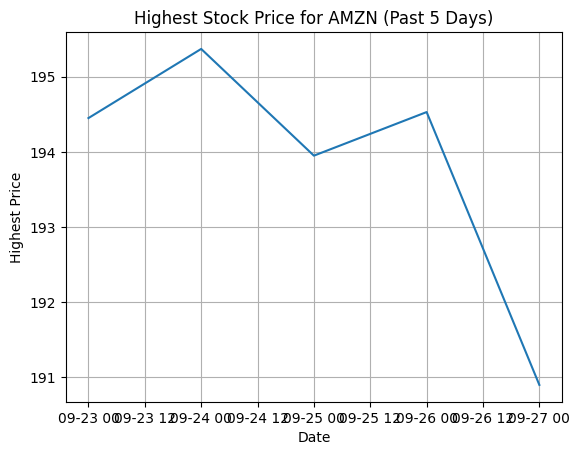

In [27]:
import matplotlib.pyplot as plt

try:

  high_prices = historical_data['High']

  plt.plot(high_prices.index, high_prices.values)
  plt.xlabel('Date')
  plt.ylabel('Highest Price')
  plt.title(f'Highest Stock Price for {ticker} (Past 5 Days)')
  plt.grid(True)
  plt.show()

except Exception as e:
  print(f"An error occurred while plotting the chart: {e}")
